## Загружаем данные

In [37]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore", category=FutureWarning)

In [21]:
df = pd.read_json('/content/drive/MyDrive/Resume project/bq-results-20241021-135105-1729518735720.json', lines=True)

**Как выглядят данные**

In [22]:
df.sample(10)

,event_time,event_type,country,device_family,session_id,user_id,type,createdType,color,density,layout,item,style,section,new_order,value,direction,skill,error,new_name,format,document_id,cl_counter,days_counter,email,first_name,last_name,choice,element,feedback,rating,plan,step,where,funnel,provider,price,product_id,quantity,revenue,revenue_type,method,experiment,variation_id,decline_reason,rebill_depth,target,category,source,query,colorScheme,fontStyle,template_name,page,place,alias
250431,2024-10-10 11:47:42.562000+00:00,app/builder.write.card/expand,United States,Mac,1728557643280,dflETIf1HXRUvfLs8igvmw==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541453,2024-09-30 01:39:26.153000+00:00,app/builder.write.work.textarea.ai_suggestion/...,United States,Apple iPhone,1727659863771,SIXwvA44Rn4VGU6w+NYU0g==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594118,2024-09-25 23:24:48.467000+00:00,app/builder.write/next,United States,Mac,1727306688467,KbdxD5wvwTEDNsHTB4Fd+g==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850293,2024-10-14 17:09:52.047000+00:00,app/cover_letter_builder/cover_letter_created,United States,Windows,1728923569391,PKQVkbVbq+LvvHX0aPd1JQ==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tVT8e7W1a8cRqfySwvx5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317750,2024-10-16 01:20:21.132000+00:00,app/builder.write.summary.textarea.ai/retry,United States,Chromium OS,1729040846717,gwpkVipO+BUHjCLvgI5teg==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378301,2024-09-30 22:59:29.466000+00:00,app/builder.design.styles/select,United States,Mac,1727735986526,MC7Ew+go9dXAlyJYf4xvcw==,NaN,NaN,NaN,NaN,NaN,NaN,ive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940609,2024-10-11 20:28:04.267000+00:00,app/builder.write.work/open,United States,Apple iPhone,1728678122640,KCnh3/ACZwFaDi83rJPrQg==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601119,2024-10-05 01:34:04.895000+00:00,app/builder.write/next,United States,Apple iPhone,1728091957232,sfnIn4oyH9dUIdKcIkmlOw==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348951,2024-10-01 17:18:45.305000+00:00,app/builder.write.work.textarea.ai_suggestion/...,United States,Windows,1727802546422,Tn6fmbtKjNk/EMRyzDI6Jg==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435589,2024-09-27 21:34:09.471000+00:00,app/builder.write.card/expand,United States,Apple iPhone,1727471525185,ijqOAIJxg2o/LDmvt0Webg==,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## До сегментирования

**Создаем таблицу с необходимыми признаками**

In [23]:
users_df = df[['user_id', 'event_time', 'event_type']].copy()
users_df['date'] = users_df['event_time'].dt.date

users_df.head(10)

,user_id,event_time,event_type,date
0,O+/kxcjglzMHIZetfZWcoQ==,2024-10-12 21:06:16.473000+00:00,app/afterpayment/click,2024-10-12
1,RHTdmxrb6hG5alpqZIw8ng==,2024-10-07 18:23:29.826000+00:00,app/afterpayment/click,2024-10-07
2,tZNlEx8xt9G8H8MrT2vIoQ==,2024-10-21 01:57:18.268000+00:00,app/afterpayment/click,2024-10-21
3,tk1sGUHPaCV2kp844VuQGA==,2024-09-23 21:49:05.141000+00:00,app/afterpayment/click,2024-09-23
4,hg9klvdh1TLj61H7ovbzHQ==,2024-10-01 21:35:09.156000+00:00,app/afterpayment/click,2024-10-01
5,WGxJIe1ImFpvtQmyOveNZg==,2024-10-14 20:05:50.117000+00:00,app/afterpayment/click,2024-10-14
6,ZE/OWyDsvofZ6ee6hfkQDw==,2024-09-24 15:48:28.840000+00:00,app/afterpayment/click,2024-09-24
7,I/ny/Li8yi7b6ZAl2c5i/Q==,2024-10-18 03:28:03.270000+00:00,app/afterpayment/click,2024-10-18
8,iXQVWJnMxkamA2YlzGgYqw==,2024-10-10 19:58:25.610000+00:00,app/afterpayment/click,2024-10-10
9,wNh6Xhq9iJhiyEL2VkO5pw==,2024-09-23 16:54:43.747000+00:00,app/afterpayment/click,2024-09-23


**Находим количество действий на сайте (любые записанные активности) и продолжительность одной сессии (максимальное и минимальное время посещения сайта за день)**

In [24]:
df_users_by_date = users_df.groupby(['user_id', 'date'])

action_count = df_users_by_date.size().reset_index(name='action_count')
session_duration = df_users_by_date['event_time'].agg(lambda x: (x.max() - x.min()).total_seconds()).reset_index(name='session_duration')

user_stats = pd.merge(action_count, session_duration, on=['user_id', 'date'])

user_stats = user_stats.groupby('user_id').agg({
    'action_count': 'mean',
    'session_duration': 'mean'
}).reset_index()


user_stats.describe()

,action_count,session_duration
count,16200.000000,16200.000000
mean,39.996850,2091.341989
std,72.204591,6671.928788
min,1.000000,0.000000
25%,1.000000,0.000000
50%,6.000000,37.266000
75%,50.000000,809.830250
max,1209.000000,81911.144000


Text(0, 0.5, 'Частота')

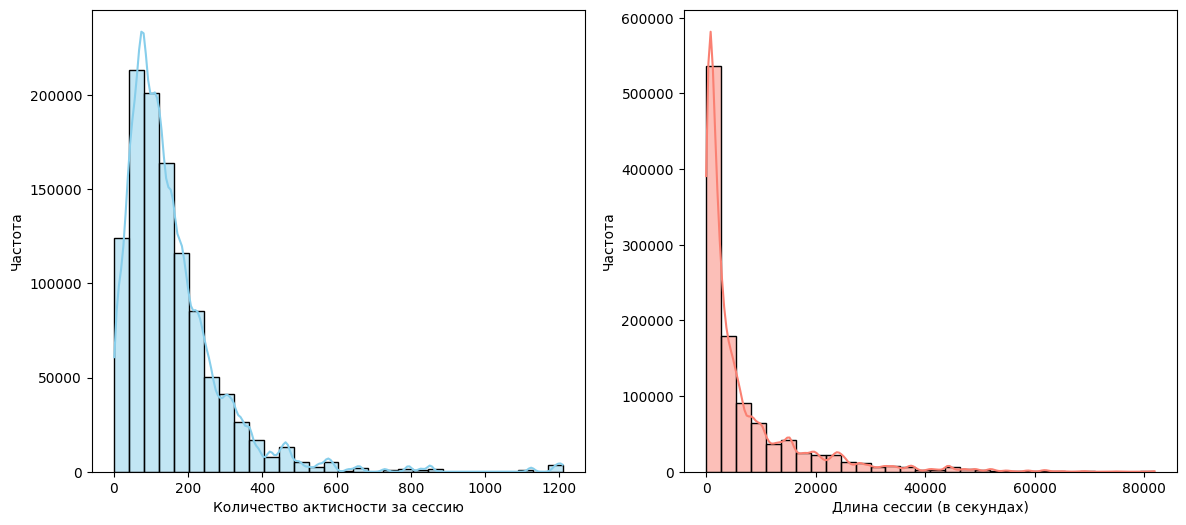

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(user_stats['action_count'], kde=True, bins=30, color='skyblue')
plt.xlabel('Количество актисности за сессию')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(user_stats['session_duration'], kde=True, bins=30, color='salmon')
plt.xlabel('Длина сессии (в секундах)')
plt.ylabel('Частота')

In [25]:
print('Процент заблудших душ:', len(user_stats[user_stats['session_duration'] < 1])/len(user_stats)*100)

Процент заблудших душ: 35.28395061728395


~35% пользователей проводят на сайте меньше одной секунды. Они не отражают поведение аудитории, но влияют на показатели средней активности и продолжительности сессий.

In [26]:
registration_events = [
    'app/sign_up/submit',
    'app/sign_up_modal/submit'
]

subscription_events = [
    'system/checkout/success',
]

subscription_cancellation_events = [
    'system/subscription/cancel'
]

def calculate_conversion(df, events, group_name=None):
  target_df = df[df['event_type'].isin(events)]

  if group_name:
    target_users = target_df.groupby(group_name)['user_id'].nunique()
    total_users = df.groupby(group_name)['user_id'].nunique()
  else:
    target_users = target_df['user_id'].nunique()
    total_users = df['user_id'].nunique()

  return (target_users / total_users) * 100

def calculate_retention(df, group_name=None):
    first_visit = df.groupby('user_id')['date'].min().reset_index()
    first_visit.columns = ['user_id', 'first_date']

    df = df.merge(first_visit, on='user_id', how='left')
    retention_df = df[df['date'] > df['first_date']].drop_duplicates(['user_id', 'date'])

    if group_name:
      retention_count = retention_df.groupby(group_name)['user_id'].nunique()
      total_users = df.groupby(group_name)['user_id'].nunique()
    else:
      retention_count = retention_df['user_id'].nunique()
      total_users = df['user_id'].nunique()

    retention_rate = (retention_count / total_users) * 100
    return retention_rate

def calculate_frequency(df, group_name=None):
    session_counts = df.groupby('user_id')['date'].nunique().reset_index(name='session_count')
    if group_name:
      session_counts = session_counts.merge(df[['user_id', group_name]], on='user_id', how='left')
      session_freq = session_counts.groupby(group_name)['session_count'].mean()
    else:
      session_freq = session_counts['session_count'].mean()
    return session_freq

Выводим основную информацию до сегментирования:
1. Количество пользователей (уникальных iser_id, посетивших сайт)
2. Среднее количество посещений сайте один пользоватем за указанный промежуток времени
3. Средняя прождолжительност одной сессиии (в секундах)
4. Среднее количество любых действий на сайте

In [27]:
pd.DataFrame({
    'Количество пользователей': [user_stats['user_id'].nunique()],
    'Среднее количество сессий': [calculate_frequency(users_df)],
    'Средняя продолжительность сессии (сек)': [user_stats['session_duration'].mean()],
    'Средняя активность на сайте': [user_stats['action_count'].mean()]
})

,Количество пользователей,Среднее количество сессий,Средняя продолжительность сессии (сек),Средняя активность на сайте
0,16200,1.45642,2091.341989,39.99685


Основные конверсии

In [28]:
pd.DataFrame({
    'Конверсия в регистрацию': [calculate_conversion(users_df, registration_events)],
    'Конверсия в подписку': [calculate_conversion(users_df, subscription_events)],
    'Конверсия в отписку': [calculate_conversion(users_df, subscription_cancellation_events)],
    'Возврат пользователей': [calculate_retention(users_df)],
})

,Конверсия в регистрацию,Конверсия в подписку,Конверсия в отписку,Возврат пользователей
0,16.259259,9.037037,6.382716,20.462963


## Сегментрирование по активности.

Так как более 35% пользователей, переходящих на сайт с рекламы или случаный образом, недостаточно взаимодействуют с ним, но влияют на многие метрики, было решено поделить пользователей на классы активности.

Всего было выделено 3 сегмента:
1. Случайные посетители - те, кто провели на сайте меньше секунды
2. Малоактивные пользователи
3. Пользователи с средней активностью
4. Очень активные пользователи

Для разделения пользователей на сегменты были использованы две ключевые метрики: количество действий на сайте (action_count) и средняя продолжительность сессии (session_duration). Для учета различий в поведении пользователей были рассчитаны 33-й и 66-й процентили (квантили) по каждой из метрик.

In [29]:
valid_user_stats = user_stats[user_stats['session_duration'] >= 1]

action_thresholds = valid_user_stats['action_count'].quantile([0.33, 0.66]).values
duration_thresholds = valid_user_stats['session_duration'].quantile([0.33, 0.66]).values

def activity_segment(row):
    if row['session_duration'] < 1:
        return 'Random Visitors'
    if row['action_count'] >= action_thresholds[1] and row['session_duration'] >= duration_thresholds[1]:
        return 'High activity'
    elif row['action_count'] <= action_thresholds[0] and row['session_duration'] <= duration_thresholds[0]:
        return 'Low activity'
    else:
        return 'Medium activity'

user_stats['activity_segment'] = user_stats.apply(activity_segment, axis=1)

order = ['Random Visitors', 'Low activity', 'Medium activity', 'High activity']
user_stats['activity_segment'] = pd.Categorical(user_stats['activity_segment'], categories=order, ordered=True)

users_df = users_df.merge(user_stats[['user_id', 'activity_segment']], on='user_id', how='left')

In [30]:
segment_counts = user_stats['activity_segment'].value_counts().sort_index()
total_users = segment_counts.sum()
segment_percent = (segment_counts / total_users) * 100

pd.DataFrame({
    'Количество пользователей': segment_counts,
    'Процент пользователей': segment_percent,
    'Среднее количество сессий': calculate_frequency(users_df, 'activity_segment'),
    'Средняя продолжительность сессии (сек)': user_stats.groupby('activity_segment')['session_duration'].mean(),
    'Средняя активность на сайте':  user_stats.groupby('activity_segment')['action_count'].mean()
})

,Количество пользователей,Процент пользователей,Среднее количество сессий,Средняя продолжительность сессии (сек),Средняя активность на сайте
activity_segment,,,,,
Random Visitors,5716,35.283951,1.752791,0.060080,1.270871
Low activity,2697,16.648148,1.414798,19.772618,5.013966
Medium activity,5469,33.759259,2.355726,2726.478210,43.933870
High activity,2318,14.308642,3.087870,8160.034824,166.905811


In [31]:
pd.DataFrame({
    'Конверсия в регистрацию': calculate_conversion(users_df, registration_events, group_name='activity_segment'),
    'Конверсия в подписку': calculate_conversion(users_df, subscription_events, 'activity_segment'),
    'Конверсия в отписку': calculate_conversion(users_df, subscription_cancellation_events, 'activity_segment'),
    'Возврат пользователей': calculate_retention(users_df, 'activity_segment'),
})

,Конверсия в регистрацию,Конверсия в подписку,Конверсия в отписку,Возврат пользователей
activity_segment,,,,
Random Visitors,0.000000,0.000000,0.174948,8.659902
Low activity,0.593252,0.037078,2.002225,9.825732
Medium activity,24.154324,9.983544,8.539038,26.513074
High activity,55.953408,39.559965,21.699741,47.670406


Итог: После сегментирования становится понятно, что основные метрики значительно меняются в зависимости от уровня вовлеченности пользователей.

Если не учитывать людей, случайно заходящих на сайт, то наиболее большой по количеству пользователей будет группа со средней активностью (33%) - целевая аудитория.

Можно наблюдать повышение общих показателей пользователей со средней активностью а сравнении с показателями до сегментации, новые данные являются более реалистичными.

Замечания:
Можно оптимизировать процесс деления пользоватей: делить не на квантили, а на подобранные промежутки, исследовав разброс пользователей.

## Сегментирование по использованию ИИ

В процессе создания резюме можно было использовать функции Искусственного Интелекта.
Вследсвие этого было рассмотрено разделение пользователей по использованию Искусственного Интелекта, для выеснения эффективности внедрения данной функции

In [32]:
ai_pattern =  r'(?<![a-zA-Z])ai(?![a-zA-Z]).*?/(add|improve|use|write|refresh|created)'

ai_usage_df = df[df['event_type'].str.contains(ai_pattern)]

users_df['ai_used'] = users_df.groupby(['user_id', 'date'])['event_type'].transform(
    lambda x: x.str.contains(ai_pattern, case=False, regex=True).any())

<ipython-input-32-84c8d1903cdc>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ai_usage_df = df[df['event_type'].str.contains(ai_pattern)]
<ipython-input-32-84c8d1903cdc>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lambda x: x.str.contains(ai_pattern, case=False, regex=True).any())


In [33]:
user_stats = user_stats.merge(users_df[['user_id', 'ai_used']], on='user_id', how='left')

segment_counts = user_stats['ai_used'].value_counts().sort_index()
total_users = segment_counts.sum()
segment_percent = (segment_counts / total_users) * 100

pd.DataFrame({
    'Количество пользователей': segment_counts,
    'Процент пользователей': segment_percent,
    'Среднее количество сессий': calculate_frequency(users_df, 'ai_used'),
    'Средняя продолжительность сессии (сек)': user_stats.groupby('ai_used')['session_duration'].mean(),
    'Средняя активность на сайте':  user_stats.groupby('ai_used')['action_count'].mean()
})

,Количество пользователей,Процент пользователей,Среднее количество сессий,Средняя продолжительность сессии (сек),Средняя активность на сайте
ai_used,,,,,
False,153914,14.19033,2.711040,4342.042570,55.480830
True,930726,85.80967,2.830156,7257.427225,171.492339


In [34]:
pd.DataFrame({
    'Конверсия в регистрацию': calculate_conversion(users_df, registration_events, group_name='ai_used'),
    'Конверсия в подписку': calculate_conversion(users_df, subscription_events, 'ai_used'),
    'Конверсия в отписку': calculate_conversion(users_df, subscription_cancellation_events, 'ai_used'),
    'Возврат пользователей': calculate_retention(users_df, 'ai_used'),
})

,Конверсия в регистрацию,Конверсия в подписку,Конверсия в отписку,Возврат пользователей
ai_used,,,,
False,3.884692,1.156158,4.493603,22.637583
True,43.049960,26.490733,9.186140,18.634166


Итог: В основном люди, пользующиеся функциями искусстыенного интелекта показывают значительно большую заинтересованность во взаимодействии с сайтом. В среднем такие пользователи проводят на сайте больше времени, чаще регистируюся и покупают подписку.
Но итнересным ялвяется и тот факт, что пользователи, не использовавшие ИИ, чаще возвращаются на сайт (т.е. число сессий за указанный промежуток времени больше 1)

Далее была рассмотрена средняя выручка с пользоватей, использовавших функции ИИ, и не использовавших их. На сайте можно было оплатить подписку 7-дневнюю подписку trial, которая после окончания недели была бы автоматически продлена.

In [35]:
revenue_df = df[df['event_type'].str.contains('revenue_amount')][['user_id', 'revenue', 'revenue_type']]

revenue_df = revenue_df.merge(users_df[['user_id', 'ai_used']], on='user_id', how='left')

revenue_summary = revenue_df.groupby('ai_used').agg(
    revenue_sum=('revenue', 'sum'),
    transaction_count=('revenue', 'count')
).reset_index()
total_revenue = revenue_summary['revenue_sum'].sum()
revenue_summary['revenue_percentage'] = (revenue_summary['revenue_sum'] / total_revenue) * 100

revenue_summary

,ai_used,revenue_sum,transaction_count,revenue_percentage
0,False,588602.25,58623,10.554539
1,True,4988166.78,623238,89.445461


Есть подписка trial. Смотрим на людей, которые купили эту подписку и продлили ее позже.

In [36]:
trial_payment_users = df[(df['event_type'] == 'system/checkout/success') & (df['plan'] == 'trial_195_2788')]
renewal_users = df[(df['event_type'] == 'system/subscription/recurring_charge') & (df['user_id'].isin(trial_payment_users['user_id'].unique()))]

def calculate_counts(group):
    initial_payment_count = group[group['user_id'].isin(trial_payment_users['user_id'].unique())]['user_id'].nunique()
    renewed_count = group[group['user_id'].isin(renewal_users['user_id'].unique())]['user_id'].nunique()
    return pd.Series({
        'initial_payment_count': initial_payment_count,
        'renewed_count': renewed_count
    })

segmented_data = users_df.groupby('ai_used').apply(calculate_counts).reset_index()
segmented_data['renewal_percentage'] = segmented_data['renewed_count'] / segmented_data['initial_payment_count'] * 100

segmented_data

<ipython-input-36-9d37607ab36f>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segmented_data = users_df.groupby('ai_used').apply(calculate_counts).reset_index()


,ai_used,initial_payment_count,renewed_count,renewal_percentage
0,False,1044,323,30.938697
1,True,1294,320,24.729521


Итог: Основаная выручка с сайта приходится с пользователей, использовавших функции ИИ - они больше заинтересованы в покупке одной из предложенных подписок. Не смотря на это, пользователи не использующие ИИ при создании резюме, чаще продлевают подписку.

Замечания: можно было лучше рассмотреть поведение пользователей на сайте: какие именно функции ИИ они используют, какими инструментами ИИ пользуются чаще всего.